# Cross-Validation

different Schemes:



*   K-Fold
*   Leave One Out (LOOCV)
*   Leave P Out (LPOCV)
*   Repeated K-Fold
*   Stratified Cross-Validation
*   Group Cross-Validation
*   Nested Cross-Validation





In [ ]:
from sklearn.model_selection import (
    KFold,
    RepeatedKFold,
    LeaveOneOut,
    LeavePOut,
    StratifiedKFold,
    cross_validate,
    train_test_split,
)

## K-Fold Cross-Validation

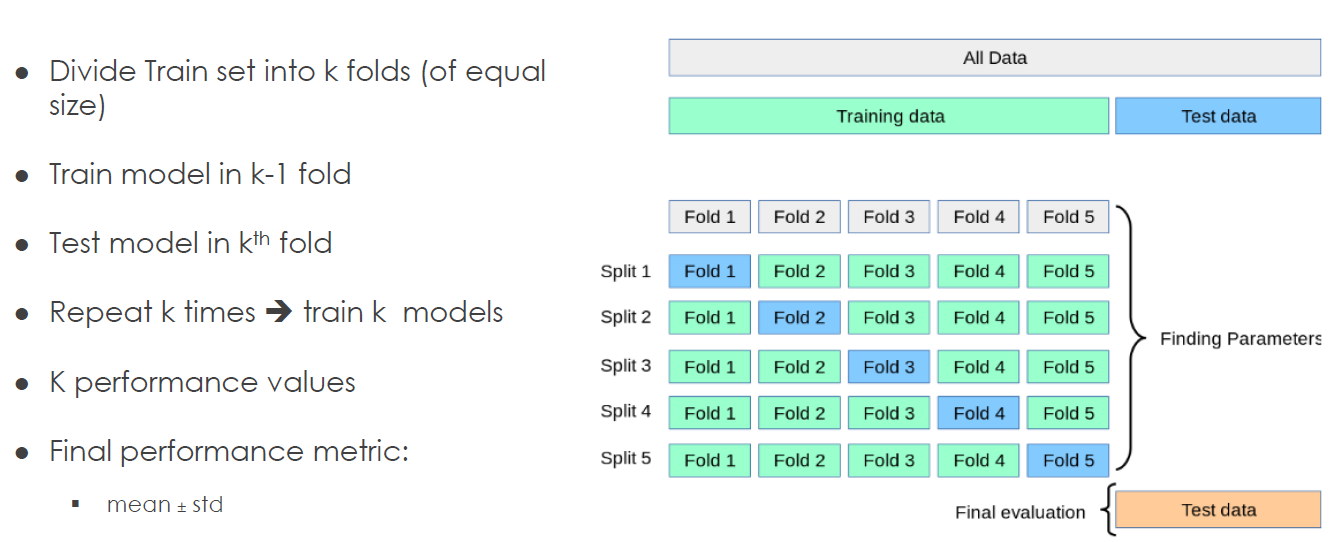

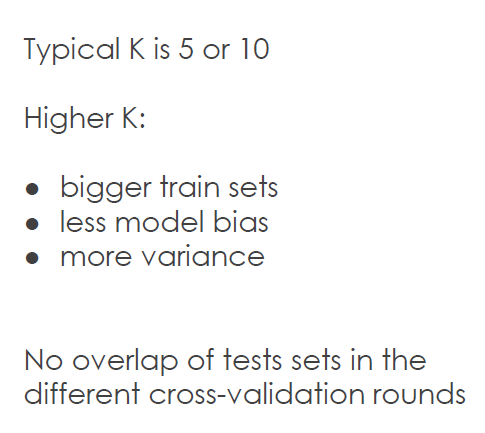

In [ ]:
# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=4)

# shuffle=True good for data that follows the same pattern accross it data.

## Leave One Out Cross-Validation

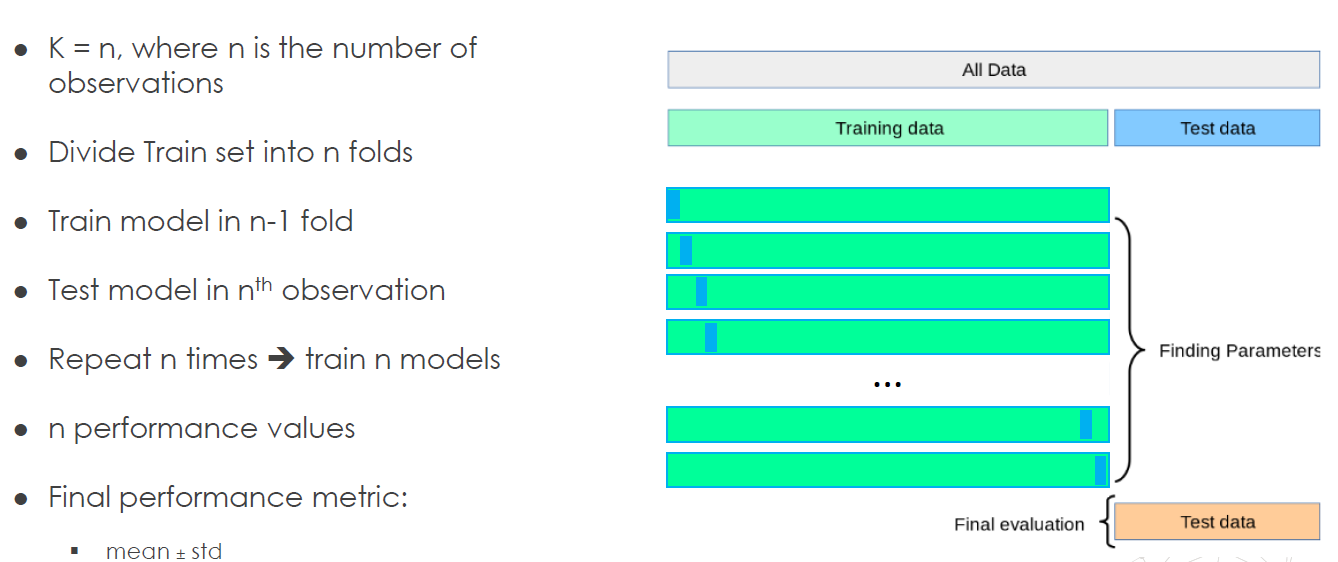

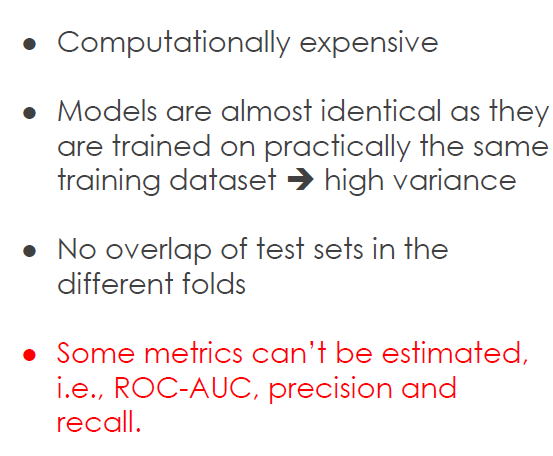

In [ ]:
# Leave One Out Cross-Validation
loo = LeaveOneOut()

## Leave P Out Cross-Validation

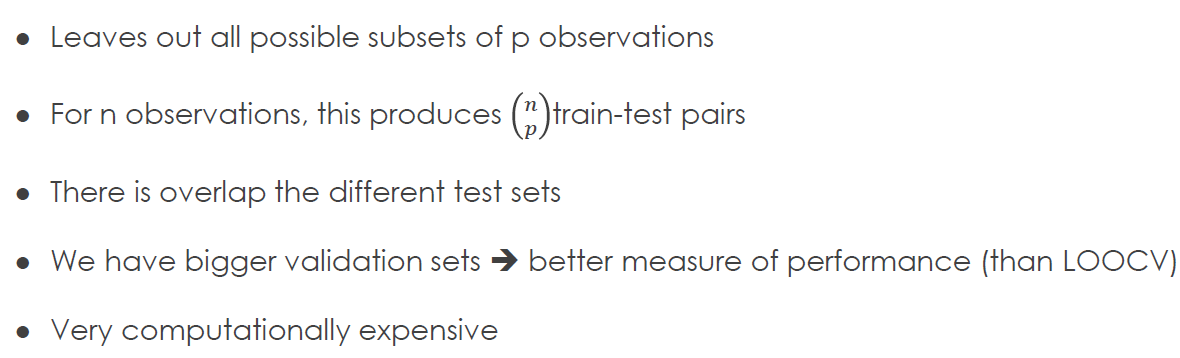

In [ ]:
# Leave P Out Cross-Validation
lpo = LeavePOut(p=2)

# p is number of observations to be out

## Repeated K-Fold Cross-Validation

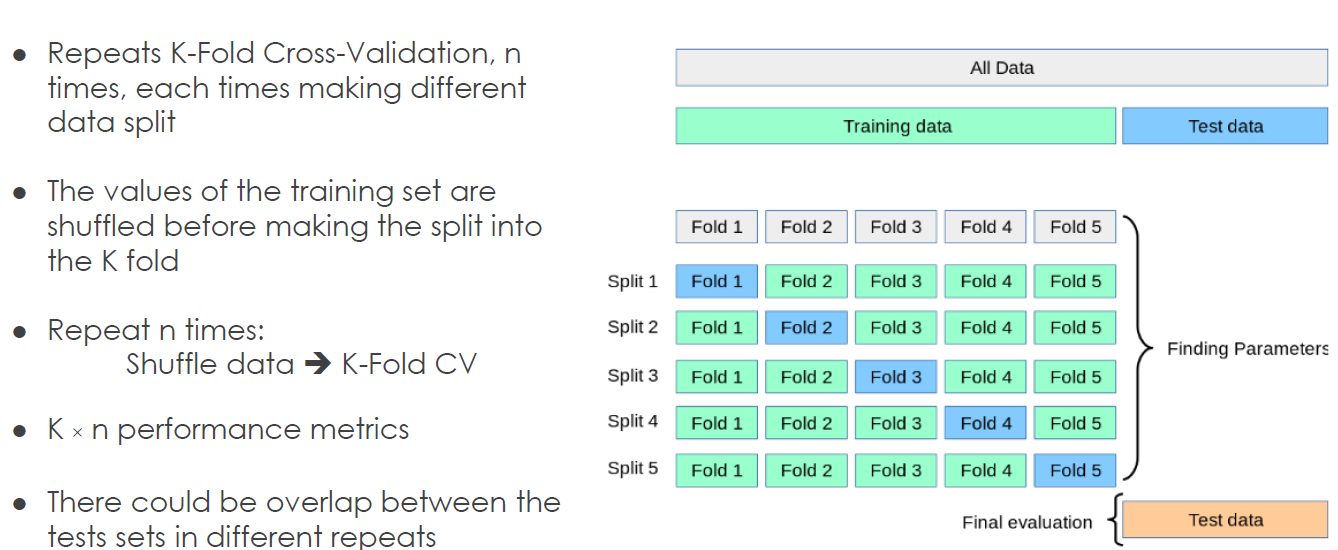

In [ ]:
# Repeated K-Fold Cross-Validation
rkf = RepeatedKFold(
    n_splits=5,
    n_repeats=10,
    random_state=4,
)

## Stratified K-Fold Cross-Validation

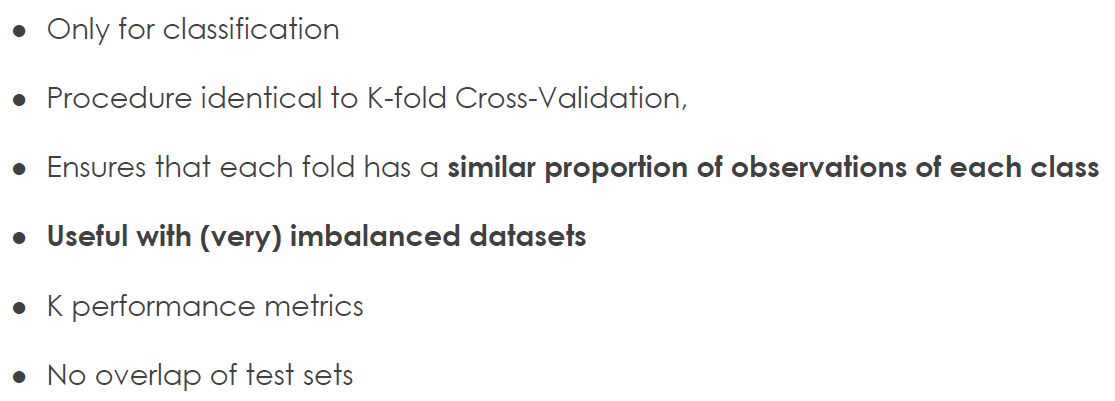

In [ ]:
# Leave P Out Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)

## NOTE (Important)

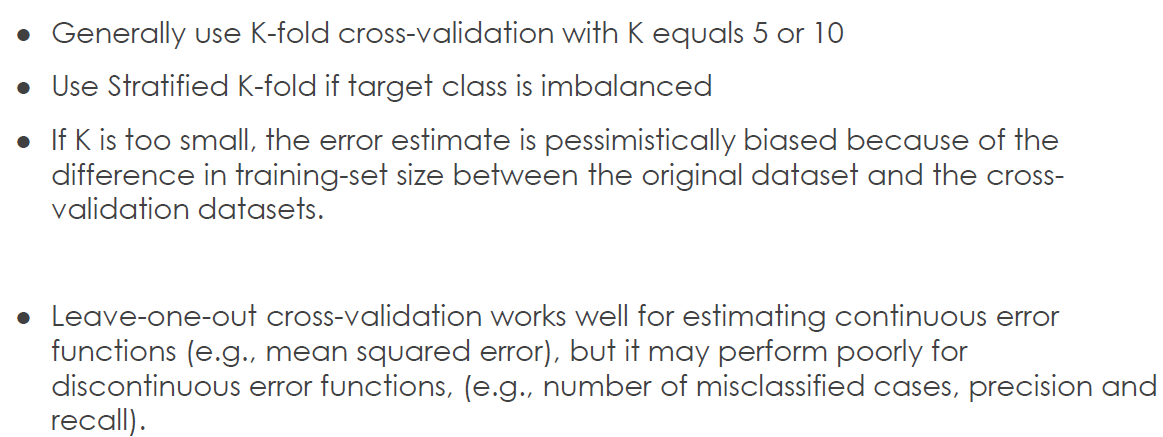

**The Cross-Validation methods that we discussed so far assume that the data is independent and identically distributed.**

**If this is the case, a similar distribution of data is guaranteed in each fold of the Cross-Validation Scheme.**

**Some data may not be independent and identically distributed:**



*   **Grouped Data (data from same subject)**
*   **Time Series**

**These datasets require a tailored cross-validation scheme.**



### Grouped Data

**Multiple observations come from the same subject**



*   **Medical data collected from patients, with multiple samples taken from each patient.**
*   **Voice recognition of say, digits, where the digits are pronounced by various speakers**





We would like to know if a model trained on a particular set of groups generalizes well to the unseen groups.

**To measure this, we need to ensure that all the samples in the validation fold come from groups that are not represented at all in the paired training fold.**

**schemes:**

*   **Group K-Fold CV**
*   **Leave One Group Out CV**
*   **Leave P Groups Out CV**

In [ ]:
from sklearn.model_selection import (
    GroupKFold,
    LeaveOneGroupOut,
    cross_validate,
    GridSearchCV,
)

## Group K-Fold Cross-Validation

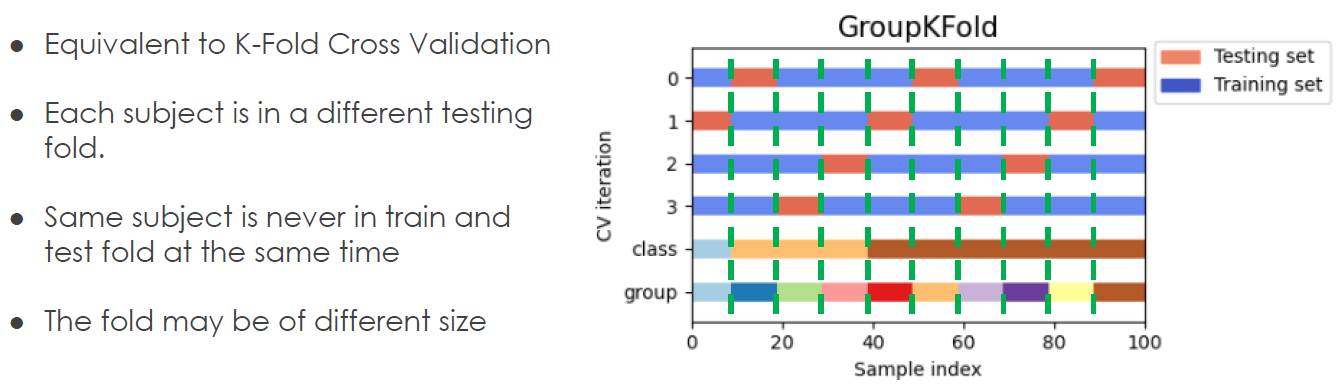

In [ ]:
# Group K-Fold Cross-Validation
gkf = GroupKFold(n_splits=5)

# estimate generalization error- how to use it it's something like this
# on the from sklearn.datasets import load_breast_cancer dataset
#clf =  cross_validate(
#    model,
#    X_train.drop('patient', axis=1), # drop the patient column, this is not a predictor
#    y_train,
#    scoring='accuracy',
#    return_train_score=True,
#    cv=gkf.split(X_train.drop('patient', axis=1), y_train, groups=X_train['patient']),
#)

## Leave One Group Out CV

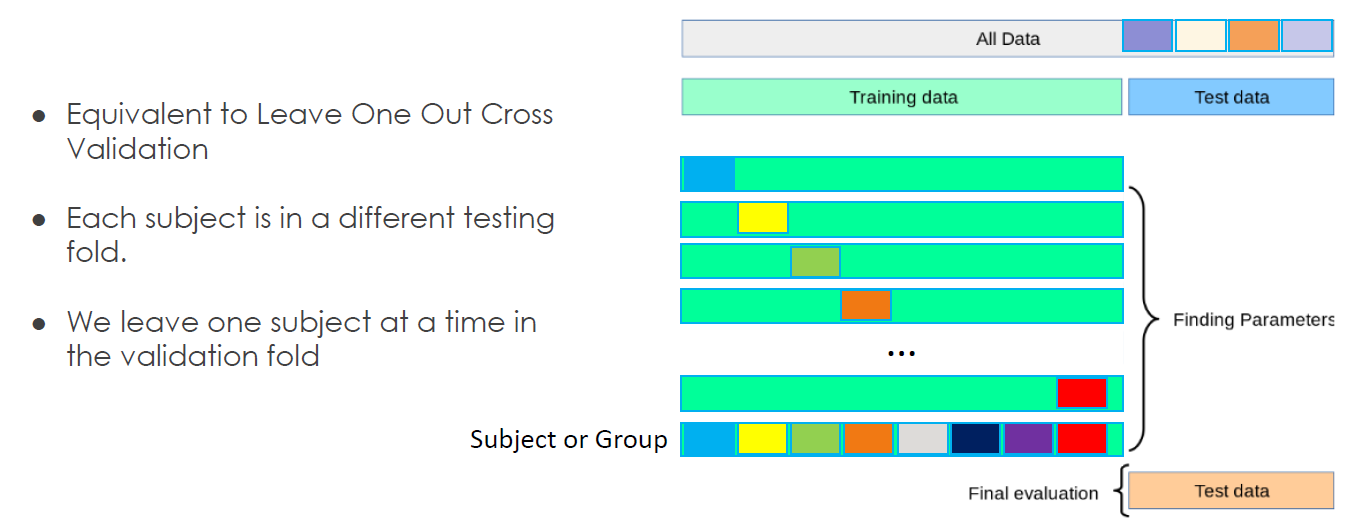

In [ ]:
# Cross-Validation
logo = LeaveOneGroupOut()

# estimate generalization error- how to use it it's something like this
# on the from sklearn.datasets import load_breast_cancer dataset
#clf =  cross_validate(
#    logit,
#    X_train.drop('patient', axis=1), # drop the patient column, this is not a predictor
#    y_train,
#    scoring='accuracy',
#    return_train_score=True,
#    cv=logo.split(X_train.drop('patient', axis=1), y_train, groups=X_train['patient']),
#)

## Leave P Groups Out CV

**Leaves out all possible combinations of p groups**

## Cross-Validation for Time Series

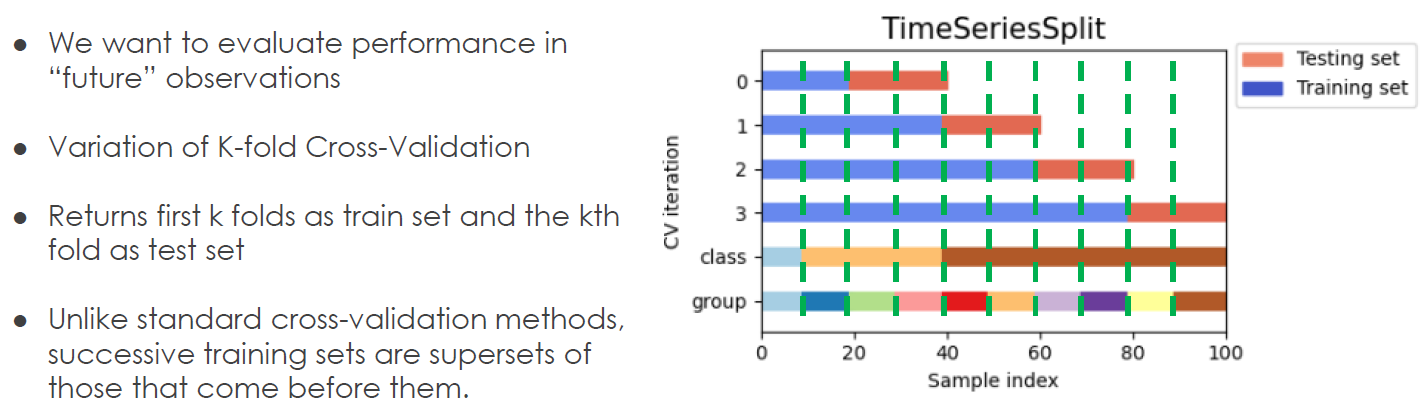

## Nested CV

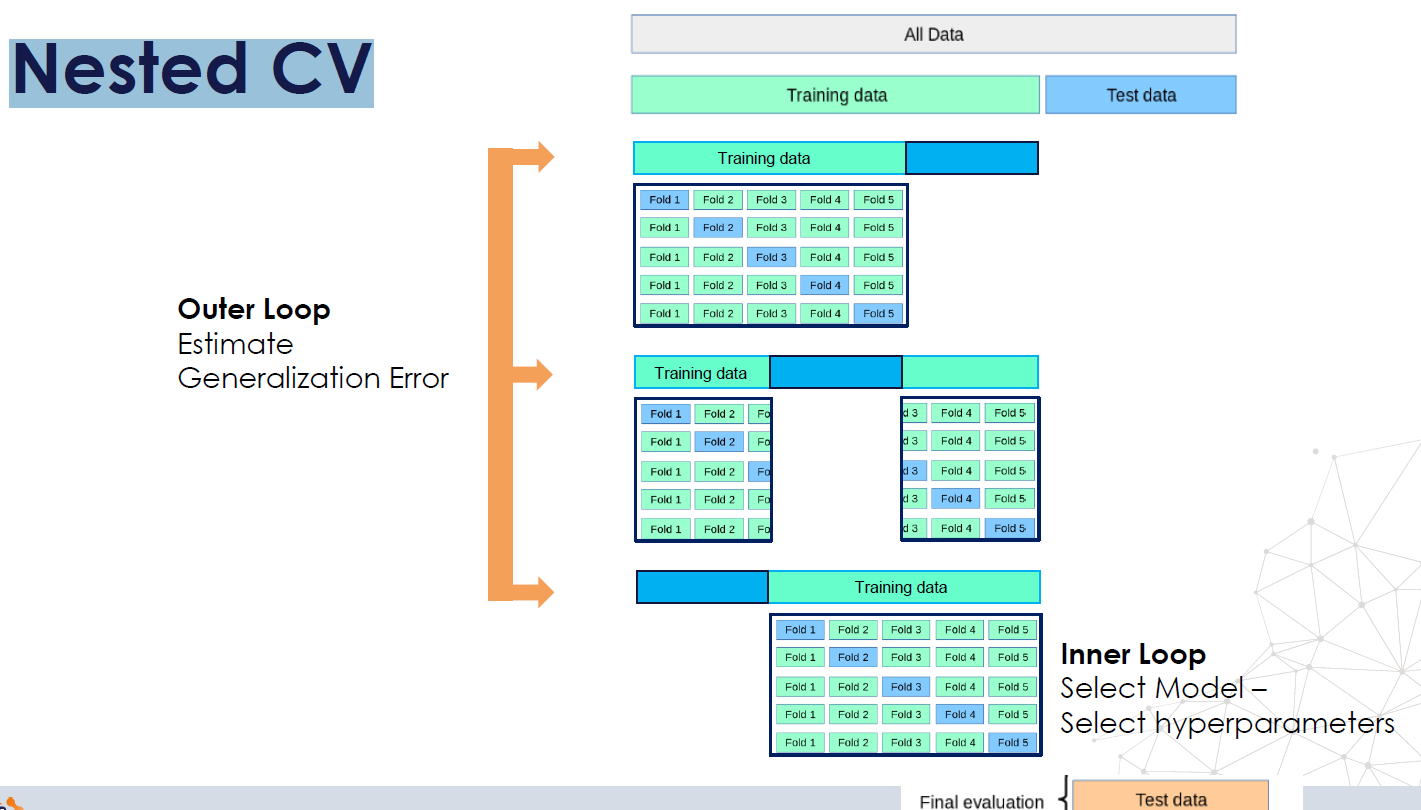

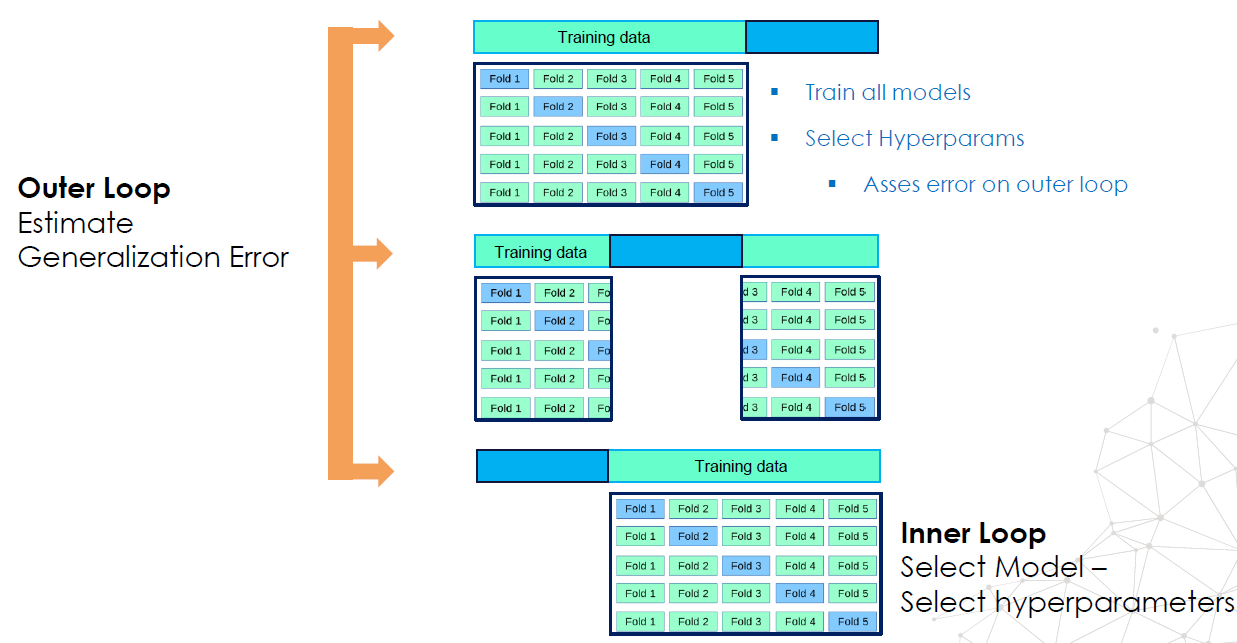

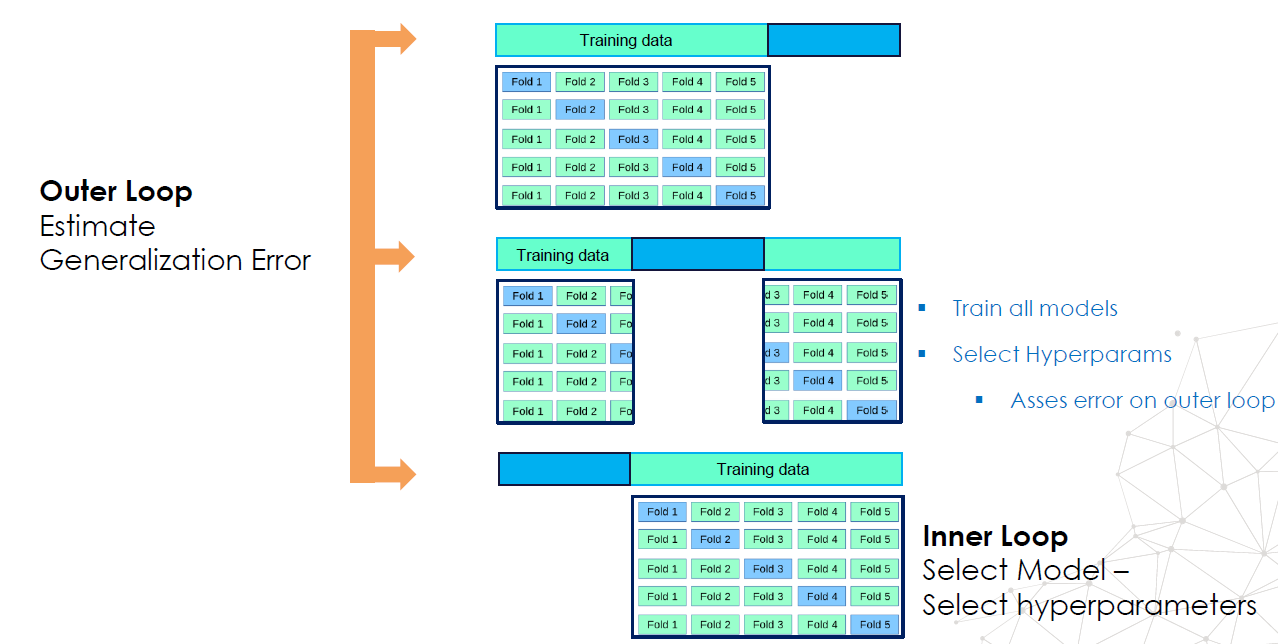

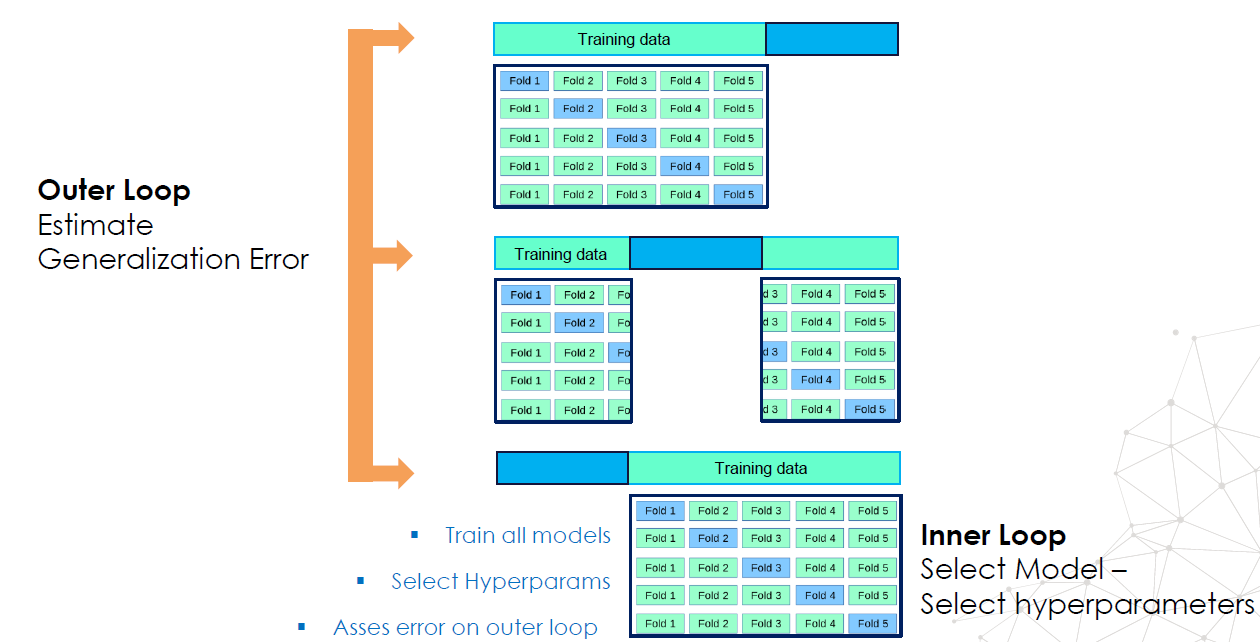

In [ ]:
# only for example we can tune it

def nested_cross_val(model, grid):

    # configure the outer loop cross-validation procedure
    cv_outer = KFold(n_splits=5, shuffle=True, random_state=1)

    # configure the inner loop cross-validation procedure
    cv_inner = KFold(n_splits=5, shuffle=True, random_state=1)

    # enumerate splits
    outer_results = list()
    inner_results = list()

    for train_ix, test_ix in cv_outer.split(X_train):

        # split data
        xtrain, xtest = X_train.loc[train_ix, :], X_train.loc[test_ix, :]
        ytrain, ytest = y_train[train_ix], y_train[test_ix]

        # define search
        search = GridSearchCV(
            model, grid, scoring='accuracy', cv=cv_inner, refit=True)

        # execute search
        search.fit(xtrain, ytrain)

        # evaluate model on the hold out dataset
        yhat = search.predict(xtest)

        # evaluate the model
        accuracy = accuracy_score(ytest, yhat)

        # store the result
        outer_results.append(accuracy)
        
        inner_results.append(search.best_score_)

        # report progress
        print(' >> accuracy_outer=%.3f, accuracy_inner=%.3f, cfg=%s' %
              (accuracy, search.best_score_, search.best_params_))

    # summarize the estimated performance of the model
    print()
    print('accuracy_outer: %.3f +- %.3f' %
          (np.mean(outer_results), np.std(outer_results)))
    print('accuracy_inner: %.3f +- %.3f' %
          (np.mean(inner_results), np.std(inner_results)))

    return search.fit(X_train, y_train)

### considerations



*   **Computationally expensive**
*   **Useful when we need a good estimation of the generalization error**
*   **Different inner models may have different hyperparameters, although I would expect to be among the top performing hyperparameters.**



Note how the accuracy of the model in the train set falls within the interval estimated in the outer loop, but outside the interval estimated with the inner loop.

The generalization error of the values obtained in the inner loop, is smaller, thus it is optimistically biased.